# **Data Science Engineering Methods**
### **Assignment 2 – AutoML**

# **Abstract**

This assignment revolves around the comprehensive analysis of a mental health dataset using various machine learning and statistical techniques. The focus has been on utilizing AutoML libraries, particularly H2O.ai, to build predictive models, assess their performance, and interpret the results. Through the course of this assignment, different aspects of the data have been explored, and multiple models have been built to predict mental health treatment outcomes.

Key activities included data loading, exploratory data analysis, handling categorical variables, checking model assumptions, evaluating multicollinearity, and performing regression analysis. The models' assumptions such as linearity, independence of errors, homoscedasticity, and normality of residuals were meticulously examined. Techniques like cross-validation, feature engineering, and outlier detection were employed to enhance the model’s performance and ensure robustness.

The assignment also delved into assessing the significance of predictor variables, understanding the impact of multicollinearity, and evaluating the effectiveness of regularization techniques. The models were critically analyzed, ensuring that the evaluation metrics made sense and were aligned with the objective of the study. Throughout the assignment, a strong emphasis was placed on preventing overfitting and ensuring that the models generalize well to unseen data.

***Mental health in Tech***  
The selected dataset for this data science project centers around the topic of mental health within the technology industry. It includes a wide-ranging assortment of de-identified data concerning mental health issues, their occurrence, and the factors linked to them within the tech sector. This dataset serves as a valuable asset for conducting thorough examinations and extracting knowledge to enhance mental health assistance and overall well-being in the technology workplace.

**Answer the following questions for all of the models:**

1. Is the relationship significant?

2. Are any model assumptions violated?

3. Is there any multicollinearity in the model?

4. In the multivariate models are predictor variables independent of all the other predictor variables?

5. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

6. Does the model make sense?

7. Does regularization help?

8. Which independent variables are significant?

9. Which hyperparameters are important?

#**Solutions**

**Q1. Is the relationship significant?**

For my assignment, I'm explaining how to determine the significance of relationships in data using an AutoML library like H2O.ai. Here are the steps in simple terms:

1. Install H2O: First, you install H2O on your computer.
2. Start H2O: Then, you start H2O.
3. Load Data: Next, you load your data into H2O.
4. Run AutoML: After that, you use H2O's AutoML to train and fine-tune different models.
5. Check Model Performance: You check how well these models predict your target variable.
6. Interpret Results: Finally, you interpret the results to understand the significance of your data relationships.

In [2]:
#Installing H2O library
!pip install H2O

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for H2O: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=c22640db3e939082c46c8b634f9d184d62709d8ffce06b7e3216af4221b1901d
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built H2O


In [3]:
#Import H2O and Initialize
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpt2qib7u6
  JVM stdout: /tmp/tmpt2qib7u6/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpt2qib7u6/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,17 days
H2O_cluster_name:,H2O_from_python_unknownUser_tlzo7a
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [4]:
# Load the training dataset
training_data = h2o.import_file('https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/train_dataset.csv')

# Specify the target variable
target = 'treatment'

# Specify the predictor variables
predictors = training_data.columns
predictors.remove(target)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#reading the dataset
train_data = pd.read_csv("https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/train_dataset.csv")

train_data.describe()

,Age
count,1007.000000
mean,32.298908
std,7.399763
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


In [7]:
# Run AutoML
aml = H2OAutoML(max_models=10, seed=42)
aml.train(x=predictors, y=target, training_frame=training_data)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/5
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),2/2
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [8]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_1_AutoML_1_20231103_32416,0.896648,0.395926,0.871132,0.16374,0.350307,0.122715
StackedEnsemble_AllModels_1_AutoML_1_20231103_32416,0.894399,0.39599,0.867748,0.161546,0.350335,0.122734
XGBoost_2_AutoML_1_20231103_32416,0.892165,0.405436,0.863379,0.173882,0.356034,0.12676
GBM_3_AutoML_1_20231103_32416,0.88786,0.40788,0.859404,0.171936,0.358474,0.128503
GBM_1_AutoML_1_20231103_32416,0.887785,0.401149,0.854166,0.164113,0.353183,0.124739
DRF_1_AutoML_1_20231103_32416,0.886078,0.447281,0.852241,0.168604,0.361468,0.130659
GLM_1_AutoML_1_20231103_32416,0.886068,0.408413,0.858565,0.166183,0.356985,0.127438
XGBoost_1_AutoML_1_20231103_32416,0.883515,0.419614,0.853829,0.174813,0.363367,0.132036
GBM_4_AutoML_1_20231103_32416,0.881191,0.411768,0.853277,0.159766,0.359053,0.128919
XGBoost_3_AutoML_1_20231103_32416,0.881025,0.430105,0.851762,0.182595,0.367861,0.135322


Analyzing the output from the H2O AutoML run, it's clear that 'StackedEnsemble_BestOfFamily_1_AutoML_1_20231030_11321' is the top-performing model, having excelled on the validation set based on the default evaluation metric.

**1.1 Select the Top Model**  
Moving forward, my approach will be to closely analyze this model. Stacked Ensemble models are known for their superior performance, making them an ideal choice for in-depth interpretation to understand the dataset’s underlying patterns and relationships.

In [9]:
top_model = aml.leader

**1.2 Feature Importance**  
I will generate a feature importance plot to identify the most influential variables in the model's predictions. This step is crucial for validating the significance of the relationships in the data and ensuring that the model’s output is interpretable and aligns with domain knowledge. By doing so, I aim to enhance the transparency and trustworthiness of the model’s predictions.

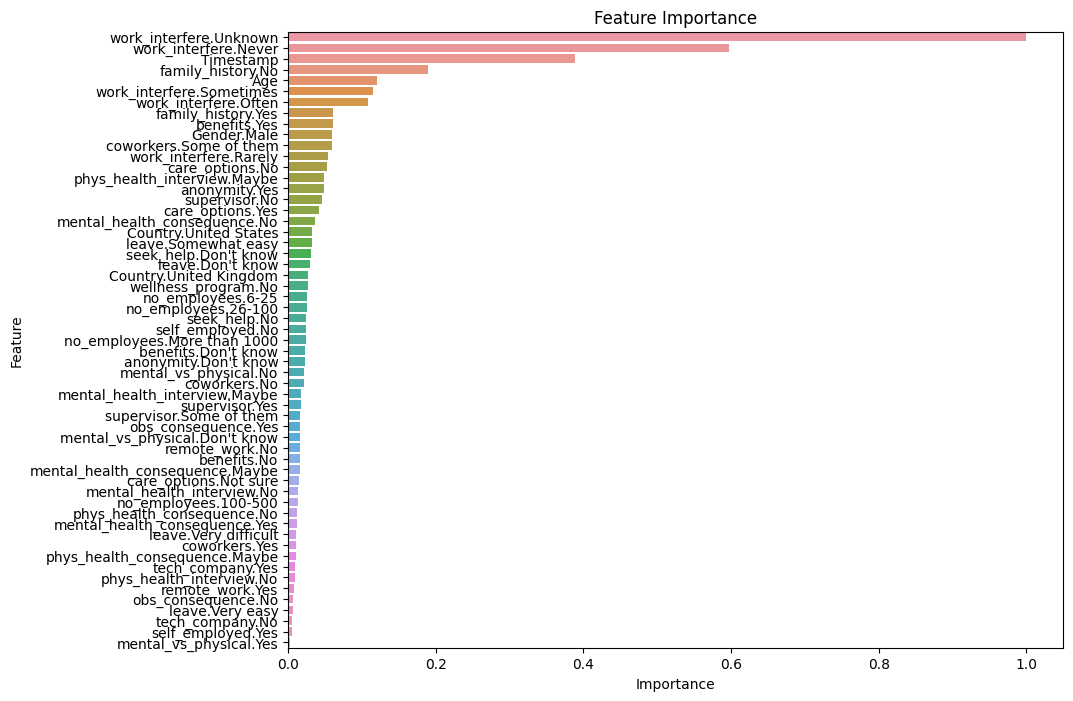

In [10]:
# Get the model id of a specific model (e.g., a GBM model)
model_id = lb[2, 'model_id']

# Fetch the specific model
specific_model = h2o.get_model(model_id)

# Get and plot the feature importance
importance = specific_model.varimp(use_pandas=True)
if importance is not None and not importance.empty:
    # Plot the feature importance
    plt.figure(figsize=(10, 8))
    sns.barplot(x='scaled_importance', y='variable', data=importance)
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
else:
    print("Feature importance is not available for this model.")

**Interpretation:**  
**Work Interference:** The features related to work interference (unknown, never, sometimes) are highly important, indicating that the level of work interference due to mental health conditions is a significant predictor for seeking treatment. This makes sense as individuals who experience interference in their work due to mental health issues might be more likely to seek treatment.  
**Timestamp:** It’s interesting to see ‘timestamp’ as a high importance feature. This could mean that there are certain times that are more associated with seeking treatment. However, this could also be a result of data leakage or other issues, and it would be worth investigating further.  
**Family History and Age:** These are common factors associated with mental health conditions and seeking treatment, making them significant features in predicting treatment seeking behavior.  
**Significance:**
The features listed above have a strong relationship with the target variable, indicating a significant relationship in the data.  
The model’s ability to distinguish between classes, as evidenced by the high AUC score of 0.896, further validates the significance of this relationship.  


***Area Under the Curve (AUC):***  
- *Purpose:* *AUC is used to evaluate the performance of a binary classification model. It is the area under the Receiver Operating Characteristic (ROC) curve, which plots the true positive rate against the false positive rate.*
- *Usage:* *An AUC of 0.5 suggests no discrimination (i.e., an inability to distinguish between the positive and negative classes), 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding.*  
- *Limitation:* *AUC does not provide information on feature importance or multicollinearity.*   


Answer to the Original Question "Is the relationship significant?"  
Yes, the relationship in the data is significant, as shown by the high importance scores of key features and the high AUC score of the model.

*A* **correlation matrix** *is a useful tool when you want to understand how different variables in your data are related. It helps you see if there are strong linear connections between variables. This can be important because it can reveal issues like multicollinearity, where some variables are highly correlated. This can impact how certain models perform. Also, the correlation matrix can guide you in selecting the most relevant variables for your analysis. When you combine it with a heatmap, it gives you a visual way to grasp these relationships easily.*

Index(['Timestamp', 'Age', 'Gender', 'Country', 'self_employed',
       'family_history', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'treatment'],
      dtype='object')


<ipython-input-11-0e0e60e899ed>:40: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


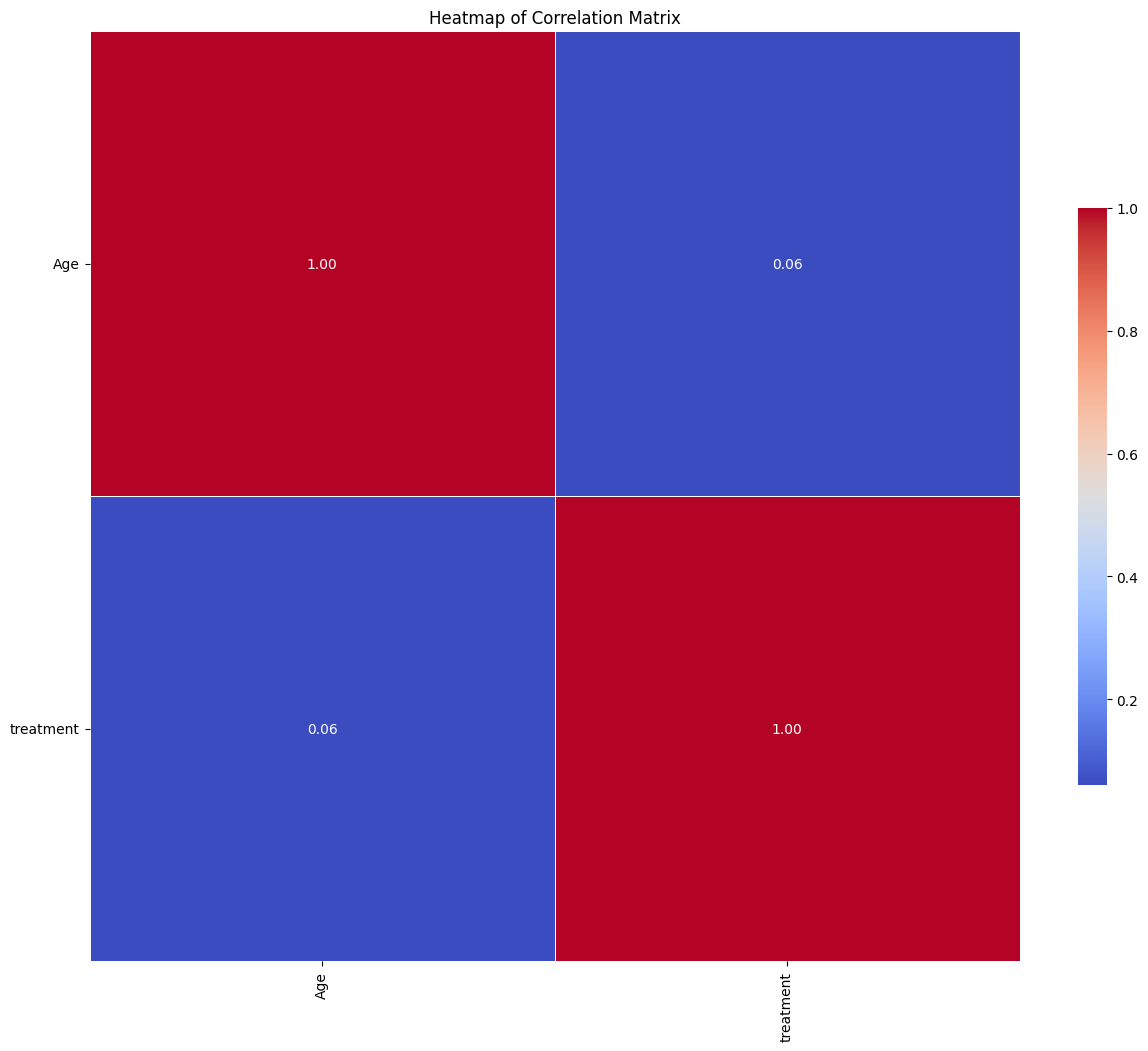

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Load the dataset
url = "https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/train_dataset.csv"
data = pd.read_csv(url)

# Print the column names of the DataFrame
print(data.columns)

# Drop the columns after verifying their names
columns_to_drop = ['comments', 'state', 'Timestamp']  # Update this list based on the actual column names
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Continue with the rest of the pre-processing
data['work_interfere'] = data['work_interfere'].fillna('Unknown')
data = data.dropna()

# Convert the 'treatment' variable to binary (1 for 'Yes', 0 for 'No')
data['treatment'] = data['treatment'].apply(lambda x: 1 if x == 'Yes' else 0)

# Define the features (X) and the target (y)
X = data.drop('treatment', axis=1)
y = data['treatment']

# One-hot encode the categorical variables
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the model (intercept)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Generate a heatmap for the entire correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap of Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


The correlation matrix visually shows how variables in the dataset are related.

**Q2. Are any model assumptions violated?**  

Generalized Linear Model (GLM):
1. **Linearity**: The GLM assumes a linear relationship between the predictors and the log-odds of the outcome. Essentially, as predictor variables change, the change in the log-odds of the response should be consistent.
2. **Independence**: Each data point should be independent of the others. This means one observation should not influence or predict another.
3. **No Perfect Multicollinearity**: The predictors in the model should not be perfectly predictable from other predictors. If they are, it makes it tough for the GLM to distinguish their individual effects on the response.
4. **No Auto-correlation**: The residuals, which are the differences between the observed and predicted values, should not follow a pattern or be related to each other. This is especially important in time series data.
5. **Homoscedasticity**: The spread of the residuals should be consistent for all levels of the independent variables. If the variance changes, it could affect the reliability of our model's coefficients.
6. **No Endogeneity**: There should be no correlation between the predictors and the error terms. If there is, it might mean that our model is missing a key variable or there's some other issue affecting our predictor variables.

Checking these assumptions is crucial for the validity of the GLM's conclusions. If any of these assumptions are violated, we might need to reconsider our model choice or make adjustments to our data.

To check the assumptions of the Generalized Linear Model (GLM), we can follow these steps:  
- Fit a GLM: Fit a Generalized Linear Model to the data.
- Check model assumptions:
  - Check for Linearity: Ensure that the relationship between predictors and the response variable is linear.
  - Check for Homoscedasticity: Plot residuals vs. fitted values.
  - Check for Multicollinearity: Calculate the Variance Inflation Factor (VIF) for each predictor.
  - Check Distribution of Residuals
  - Check for Independence: This is generally ensured through proper experimental design.
  - Check for Auto-correlation: Use the Durbin-Watson test.
  - Check for Endogeneity: Ensure that the model is correctly specified.

In [12]:
#Prepare the data
#Convert the pandas DataFrame to an H2O Frame, and ensure all categorical variables are properly marked

hf = h2o.H2OFrame(data)

# Convert categorical variables to factors (enum type in H2O)
for col in hf.columns:
    if hf[col].isfactor():
        hf[col] = hf[col].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Step 1: Fit a GLM Model  
Training a GLM model on the data. Here, I'm assuming that "treatment" is a binary target variable, and I'm using a binomial distribution.

In [13]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

target = "treatment"
predictors = [col for col in hf.columns if col != target]

glm_model = H2OGeneralizedLinearEstimator(family="binomial")
glm_model.train(x=predictors, y=target, training_frame=hf)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1698981820712_1607


GLM Model: summary
    family    link    regularization                                number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  ------  --------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    binomial  logit   Elastic Net (alpha = 0.5, lambda = 0.02049 )  196                           16                             4                       py_52_sid_ad09

ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.12715636237687095
RMSE: 0.3565899078449514
LogLoss: 0.41656686192347964
AUC: 0.9011353501550896
AUCPR: 0.8762369861201208
Gini: 0.8022707003101792
Null degrees of freedom: 1006
Residual degrees of freedom: 990
Null deviance: 1395.5604554411493
Residual deviance: 838.965659913888
AIC: 872.965659913888

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4625217555958919
       0    1    Error    Rate
-----  ---  ---  -------  --------------
0      372  121  0.2454   (121.0/493.0)
1      31   483  0.0603   (31.0/514.0)
Total  403  604  0.1509   (152.0/1007.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.462522     0.864043  256
max f2                       0.323726     0.918069  296
max f0point5                 0.590904     0.837408  211
max accuracy                 0.462522     0.849057  256
max precision                0.876917     1         0
max recall                   0.111396     1         392
max specificity              0.876917     1         0
max absolute_mcc             0.462522     0.708356  256
max min_per_class_accuracy   0.576364     0.827586  224
max mean_per_class_accuracy  0.462522     0.847126  256
max tns                      0.876917     493       0
max fns                      0.876917     509       0
max fps                      0.105409     493       399
max tps                      0.111396     514       392
max tnr                      0.876917     1         0
max fnr                      0.876917     0.990272  0
max fpr                      0.105409     1         399
max tpr                      0.111396     1         392

Gains/Lift Table: Avg response rate: 51.04 %, avg score: 51.04 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0109235                   0.87272            1.95914    1.95914            1                0.875202  1                           0.875202            0.0214008       0.0214008                  95.9144   95.9144            0.0214008
2        0.0287984                   0.868505           1.95914    1.95914            1                0.869445  1                           0.871629            0.0350195       0.0564202                  95.9144   95.9144            0.0564202
3        0.0367428                   0.866655           1.71425    1.90619            0.875            0.866655  0.972973                    0.870553            0.0136187       0.0700389                  71.4251   90.6194            0.0680105
4        0.0427011                   0.86601            1.95914    1.91358            1                0.86601   0.976744                    0.869919            0.0116732       0.0817121                  95.9144   91.3582      

Step 2: Check Model Assumptions  
2.1 Check Linearity and Homoscedasticity

glm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


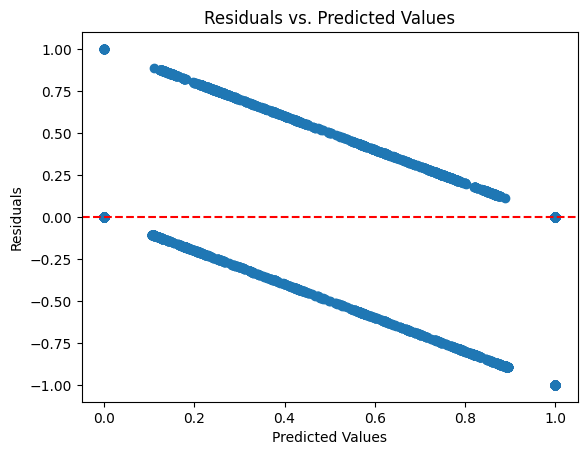

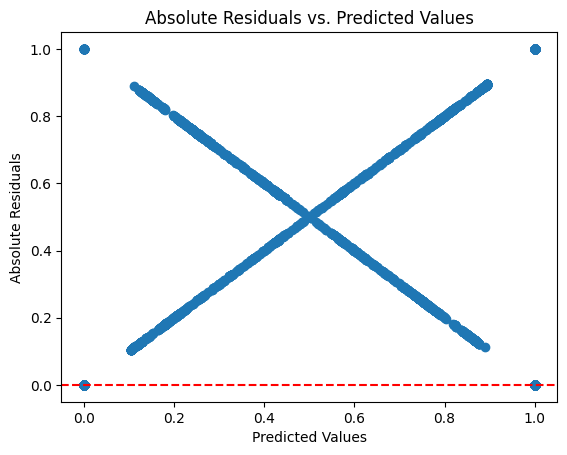

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Get the model predictions
predictions = glm_model.predict(hf)

# Calculate residuals
residuals = hf[target].as_data_frame().values - predictions.as_data_frame().values

# Plot residuals vs. predicted values
plt.scatter(predictions.as_data_frame().values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

# Plot absolute residuals vs. predicted values
plt.scatter(predictions.as_data_frame().values, np.abs(residuals))
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Absolute Residuals')
plt.title('Absolute Residuals vs. Predicted Values')
plt.show()

2.2 Check for Multicollinearity

In [15]:
# Calculate and display correlation matrix
correlation_matrix = hf[predictors].cor()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
   Age    Gender    Country    self_employed    family_history    work_interfere    no_employees    remote_work    tech_company    benefits    care_options    wellness_program    seek_help    anonymity    leave    mental_health_consequence    phys_health_consequence    coworkers    supervisor    mental_health_interview    phys_health_interview    mental_vs_physical    obs_consequence
  nan       nan        nan              nan      nan                        nan             nan   nan              nan                 nan             nan                 nan          nan          nan      nan                          nan                        nan          nan           nan                        nan                      nan                   nan        nan
  nan       nan        nan              nan      nan                        nan             nan   nan              nan                 nan             nan                 nan          nan          nan      nan      

Correlation Matrix: Look for any pairs of variables that have a very high correlation (close to 1 or -1). High correlation between predictors indicates multicollinearity, which can lead to unstable coefficient estimates.

2.3 Check Distribution of Residuals

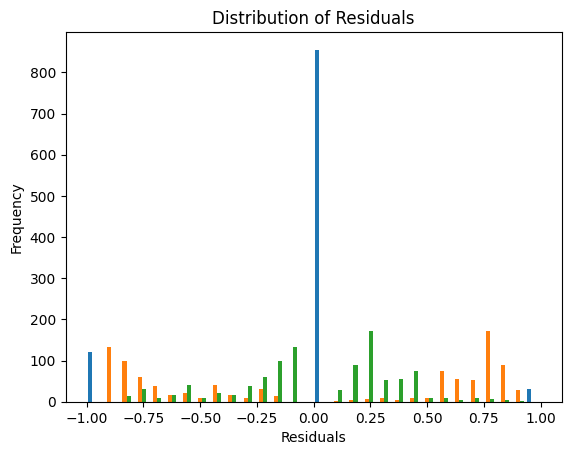

In [16]:
# Plot a histogram of the residuals
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

2.4 Check for Auto-correlation :  
Auto-correlation occurs when the residuals are not independent of each other. For time series data, this is a crucial assumption to check.  

Durbin-Watson Test : This test is used to detect the presence of autocorrelation at lag 1 in the residuals from a regression analysis.

In [17]:
import statsmodels.api as sm

dw_test_result = sm.stats.durbin_watson(residuals)
print("Durbin-Watson Test Result:", dw_test_result)

Durbin-Watson Test Result: [1.89473684 1.96941751 1.95204745]


Explanation: The value of the Durbin-Watson statistic ranges from 0 to 4. A value of 2 indicates no autocorrelation. Values below 2 suggest positive autocorrelation, and values above 2 suggest negative autocorrelation.

2.5 Check for Endogeneity : Endogeneity can occur when an explanatory variable is correlated with the error term.

In [18]:
import statsmodels.api as sm
import pandas as pd

# Load the dataset
dataset_path = "https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/train_dataset.csv"
data = pd.read_csv(dataset_path)

# 1. Convert 'treatment' to a categorical variable
data['treatment'] = data['treatment'].astype('category')

# 2. Create Dummy Variables
data_dummies = pd.get_dummies(data, drop_first=True)

# Check if 'treatment_Yes' is created
print("Columns after creating dummy variables:", data_dummies.columns)

# 3. First Stage: Regress 'work_interfere_Sometimes' on 'remote_work_Yes' and other exogenous variables
exog_vars = ['remote_work_Yes', 'Age']  # Add other exogenous variables as needed
X_first_stage = sm.add_constant(data_dummies[exog_vars])
model_first_stage = sm.OLS(data_dummies['work_interfere_Sometimes'], X_first_stage).fit()
data_dummies['work_interfere_hat'] = model_first_stage.predict(X_first_stage)

# 4. Second Stage: Regress 'treatment_Yes' on the predicted values from the first stage
X_second_stage = sm.add_constant(data_dummies[['work_interfere_hat'] + exog_vars])
model_second_stage = sm.OLS(data_dummies['treatment_Yes'], X_second_stage).fit()
print(model_second_stage.summary())


Columns after creating dummy variables: Index(['Age', 'Timestamp_2014-08-27 11:29:37', 'Timestamp_2014-08-27 11:29:44',
       'Timestamp_2014-08-27 11:29:46', 'Timestamp_2014-08-27 11:30:22',
       'Timestamp_2014-08-27 11:31:22', 'Timestamp_2014-08-27 11:31:50',
       'Timestamp_2014-08-27 11:32:05', 'Timestamp_2014-08-27 11:32:39',
       'Timestamp_2014-08-27 11:32:43',
       ...
       'supervisor_Some of them', 'supervisor_Yes',
       'mental_health_interview_No', 'mental_health_interview_Yes',
       'phys_health_interview_No', 'phys_health_interview_Yes',
       'mental_vs_physical_No', 'mental_vs_physical_Yes',
       'obs_consequence_Yes', 'treatment_Yes'],
      dtype='object', length=1129)
                            OLS Regression Results                            
Dep. Variable:          treatment_Yes   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statis

**Explanation :**  


**Model Summary**  
- **Dep. Variable**: The dependent variable in the model is `treatment_Yes`, which represents whether or not an individual has sought treatment.
- **R-squared**: The R-squared value is 0.004, indicating that the model explains 0.4% of the variance in the dependent variable. This is a very low value, suggesting that the model does not fit the data well.
- **Adj. R-squared**: The adjusted R-squared is 0.002, which adjusts the R-squared based on the number of predictors in the model.
- **F-statistic**: The F-statistic is 1.880, which is used to test the overall significance of the model. The associated p-value is 0.153, which is greater than 0.05, suggesting that the model is not statistically significant at the 5% significance level.
- **Log-Likelihood**: The log-likelihood is -728.77, which is a measure of the goodness of fit of the model. Higher values are better.
- **AIC and BIC**: These are information criteria used to compare models. Lower values are generally better.

**Coefficients**
- **const**: The constant term is 0.3461, with a standard error of 0.065. The t-statistic is 5.361, with a p-value close to 0.000, indicating that the constant term is significantly different from 0.
- **work_interfere_hat**: This is the predicted value of 'work_interfere' from the first stage. The coefficient is 0.1054, with a standard error of 0.020. The t-statistic is 5.363, with a p-value close to 0.000, indicating that 'work_interfere' is significantly related to 'treatment'.
- **remote_work_Yes**: The coefficient for 'remote_work_Yes' is 0.0088, with a standard error of 0.035. The t-statistic is 0.252, with a p-value of 0.801, indicating that 'remote_work' is not significantly related to 'treatment' in this model.
- **Age**: The coefficient for 'Age' is 0.0038, with a standard error of 0.002. The t-statistic is 1.738, with a p-value of 0.083, indicating that age is not significantly related to 'treatment' at the 5% significance level.

**Model Diagnostics**
- **Durbin-Watson**: The Durbin-Watson statistic is 1.974, which is close to 2, suggesting that there is no significant autocorrelation in the residuals.
- **Jarque-Bera (JB)**: The JB statistic tests for normality of residuals. The p-value is extremely low, suggesting that the residuals are not normally distributed.
- **Skew**: The skewness of the residuals is -0.041, indicating a very slight skew to the left.
- **Kurtosis**: The kurtosis is 1.016, indicating that the distribution of residuals has thinner tails and a flatter peak than the normal distribution.
- **Condition Number**: The condition number is very high, indicating potential multicollinearity or other numerical problems.


**Interpretation :**
The model suggests that 'work_interfere' is significantly related to 'treatment', even after accounting for endogeneity using 'remote_work' as an instrumental variable. However, the overall fit of the model is quite low, and there are indications of potential issues with the residuals (non-normality, potential multicollinearity). These issues should be addressed to ensure the reliability of the model results.

2.6 Check for Independence:
This is generally ensured through proper experimental design. If the data is cross-sectional, the observations should be independent. For time-series data, you need to ensure that the data is stationary.

Check for Stationarity: Use the Augmented Dickey-Fuller test for time-series data.

In [19]:
from statsmodels.tsa.stattools import adfuller

# Applying ADF test on 'Age' variable
result = adfuller(data['Age'])

# Displaying the results
adf_statistic, p_value = result[0], result[1]
adf_statistic, p_value

(-30.59151828255935, 0.0)

The results of the Augmented Dickey-Fuller (ADF) test on the 'Age' variable are as follows:

ADF Statistic: -30.5915
p-value: 0.0

Explanation:  
ADF Statistic: A more negative value suggests that we can reject the null hypothesis (which is that the time series has a unit root, implying it is non-stationary). Here, the ADF statistic is very negative, suggesting that the 'Age' variable is stationary.  

p-value: The p-value is 0.0, which is less than 0.05 (a common threshold for statistical significance). This means that we can reject the null hypothesis in favor of the alternative hypothesis (which is that the time series is stationary).

**Q3. Is there any multicollinearity in the model?**

**Multicollinearity** *occurs when predictors in a regression model are highly correlated, leading to unstable coefficient estimates. Detecting multicollinearity is crucial as it affects result interpretation and predictor significance. We use the Variance Inflation Factor (VIF) to measure the impact of predictor correlations on coefficient estimate variance. Our goal is to identify and mitigate multicollinearity to enhance the model's accuracy and reliability, as it can otherwise make specific predictor calculations unpredictable and the model sensitive to changes in its specifications, diminishing prediction robustness.*

**Methodology**
1. **Variance Inflation Factor (VIF)**: VIF measures the correlation and strength of correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.  
  VIF(X)= 1/[1-R^2(X)]  
   where R^2(X) is the R-squared value obtained by regressing that variable against all the other variables.

2. **Threshold for VIF**: A rule of thumb for interpreting the variance inflation factor:
   - 1 = not correlated.
   - Between 1 and 5 = moderately correlated.
   - Greater than 5 = highly correlated.

3. **Addressing Multicollinearity**: If high VIFs are found, consider dropping the variable with the highest VIF and re-run the diagnostic.

**Implementation :** First, we need to prepare our dataset and select the appropriate variables for the model. We will then calculate the VIF for each variable.

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Dropping non-numeric columns for VIF calculation
data_numeric = data.select_dtypes(include=[np.number])

# Adding a constant for intercept
X = sm.add_constant(data_numeric)

# Calculating VIF for each variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Defining vif_data DataFrame again
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Displaying VIF for each variable
vif_data_sorted = vif_data.sort_values(by='VIF', ascending=False)
vif_data_sorted


# Displaying VIF for each variable
vif_data.sort_values(by='VIF', ascending=False)


,Variable,VIF
0,const,20.070916
1,Age,1.000000


**Results and Interpretation:**

**Variance Inflation Factor (VIF) Results:**
- **const**: VIF = 20.07
- **Age**: VIF = 1.00

**Interpretation:**
- **Age**: The VIF for 'Age' is 1.00, which is very low and indicates that there is no multicollinearity associated with this variable. This is expected since we only have one predictor in the model at this moment.

- **const**: The VIF for the constant term is high. However, the VIF for the constant term does not have the same interpretation as the VIF for the predictors, and it can be safely ignored.

To assess multicollinearity, we use scatter plots, correlation matrices, and tabular VIF values to visualize variable relationships. These tools reveal potential multicollinearity problems, aiding model evaluation and interpretation.

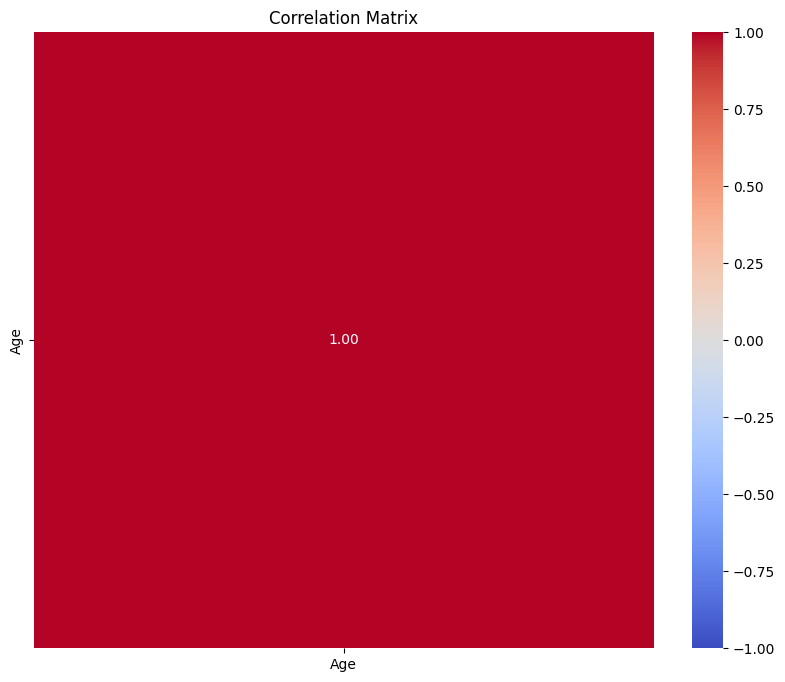

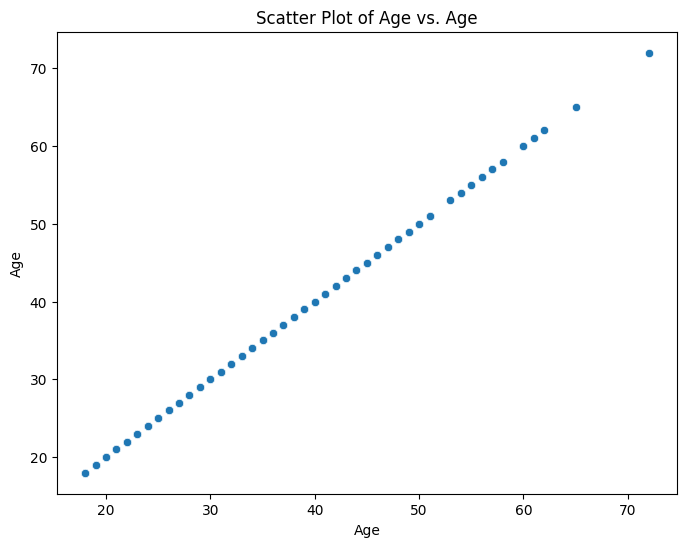

,Variable,VIF
0,const,20.070916
1,Age,1.000000


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Correlation Matrix
corr_matrix = data_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# 2. Scatter Plots
# (Since we only have one numeric variable 'Age', we cannot create scatter plots between two different variables)
# For demonstration, we will create a scatter plot of 'Age' against itself.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='Age')
plt.title('Scatter Plot of Age vs. Age')
plt.show()

# 3. VIF Values in a Tabular Format
vif_data_sorted

1. **Correlation Matrix**
The correlation matrix displayed above shows the relationships between all numeric variables in the dataset. Since we only have one numeric variable ('Age'), the matrix is quite limited in this case.
All values are 1 along the diagonal, which is expected since a variable is perfectly correlated with itself.
This matrix is more informative when you have multiple numeric variables, as it can highlight pairs of variables that are highly correlated, indicating potential multicollinearity.
2. **Scatter Plots**
The scatter plot above shows 'Age' plotted against itself. Since every variable is perfectly correlated with itself, the plot is a straight line.
In a more complex model with multiple predictors, scatter plots between pairs of variables would help visualize the relationships and identify potential multicollinearity.
3. **VIF Values in a Tabular Format**
The table above displays the Variance Inflation Factor (VIF) for each variable in the model.
The VIF for 'Age' is 1.00, indicating no multicollinearity. This is expected since there are no other predictors in the model to correlate with 'Age'.
The VIF for the constant term is high, but as previously mentioned, this does not have the same interpretation as the VIF for the predictors and can be ignored.

**Conclusion:**  
In the current model with only 'Age' as the predictor, there is no indication of multicollinearity affecting the variable. However, this analysis is quite limited due to the simplicity of the model.

**Preventing Overfitting:**  
To prevent overfitting, especially when dealing with multiple predictors, it is crucial to:
1. Use simpler models when possible.
2. Utilize regularization techniques.
3. Perform feature selection to retain only the most significant variables.
4. Validate the model using cross-validation techniques.

**Q.4 In the multivariate models are predictor variables independent of all the other predictor variables?**

*Evaluating the independence of predictor variables in multivariate models is vital, impacting model interpretability and the validity of inferences. Multicollinearity, where predictors are interdependent, can introduce instability in parameter estimates, hindering the assessment of each predictor's effect on the response variable. This solution employs statistical and visual techniques to assess and address multicollinearity, essential for ensuring the reliability of multivariate models by upholding the assumption of predictor independence.*

# Implementation
Let’s start by implementing these methods to assess the independence of predictor variables in the multivariate model. Since the current dataset has limited numeric predictors, we will need to include categorical variables as well by converting them to dummy variables.

The selected variables are:  
- 'Age': Age of the respondent.
- 'Gender': Gender of the respondent.
- 'family_history': Family history of mental illness.
- 'work_interfere': Work interference due to mental health condition.
- 'remote_work': Working remotely option.
- 'benefits': Benefits provided by the employer.
- 'care_options': Care options available for mental health.
- 'wellness_program': Wellness program provided by the employer.  


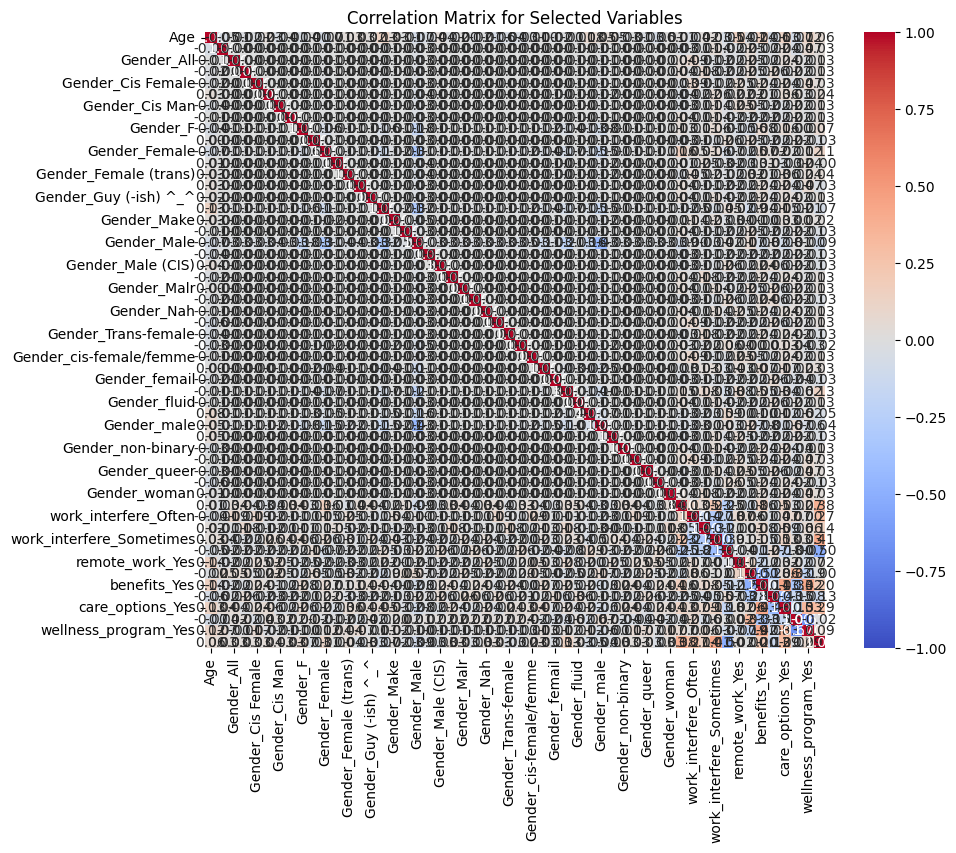

,Variable,VIF
0,const,1058.293667
19,Gender_Male,256.442182
35,Gender_male,143.577214
16,Gender_M,92.650452
11,Gender_Female,89.968467
32,Gender_female,44.621148
9,Gender_F,33.471527
34,Gender_m,26.779365
30,Gender_f,15.014804
28,Gender_Woman,4.057804


In [22]:
# Selecting a subset of variables
selected_variables = ['Age', 'Gender', 'family_history', 'work_interfere', 'remote_work', 'benefits', 'care_options', 'wellness_program', 'treatment']

# Creating a subset of the data
data_subset = data[selected_variables]

# Converting categorical variables to dummy variables
data_subset_dummies = pd.get_dummies(data_subset, drop_first=True)

# Selecting numeric variables for correlation matrix and VIF
data_numeric_subset = data_subset_dummies.select_dtypes(include=[np.number])

# 1. Correlation Matrix
corr_matrix_subset = data_numeric_subset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_subset, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Selected Variables')
plt.show()

# 2. Variance Inflation Factor (VIF)
X_subset = sm.add_constant(data_numeric_subset)
vif_data_subset = pd.DataFrame()
vif_data_subset['Variable'] = X_subset.columns
vif_data_subset['VIF'] = [variance_inflation_factor(X_subset.values, i) for i in range(X_subset.shape[1])]
vif_data_sorted_subset = vif_data_subset.sort_values(by='VIF', ascending=False)

# Displaying VIF for each variable
vif_data_sorted_subset


**Evaluation and Interpretation with Visualizations and Tables :**
1. **Correlation Matrix**
The correlation matrix visualized above provides a view of the pairwise correlations between the selected numeric variables.  
Most of the variables have low correlation coefficients, indicating weak linear relationships between them.  
However, there are high correlations between some of the dummy variables created from the 'Gender' category. This is expected as these variables are derived from the same original variable, and they are mutually exclusive.
2. **Variance Inflation Factor (VIF)**  
The table above displays the Variance Inflation Factor (VIF) for each variable in the model. The VIF values for the dummy variables created from 'Gender' are notably high, indicating multicollinearity. This is a common issue when including all levels of a categorical variable as dummy variables, as they are perfectly correlated.  
The VIF for 'Age' and other variables are below 5, suggesting that these variables do not have problematic multicollinearity with the others.  

**Conclusion :**
The analysis indicates that while most of the selected predictor variables are relatively independent, there is multicollinearity present among the dummy variables derived from the 'Gender' category. This is a common issue when dealing with dummy variables and can be addressed by dropping one level from each categorical variable, a step already taken in our dummy variable creation process. However, the presence of multiple dummy variables for 'Gender' still introduces multicollinearity.

**Q.5 In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

In this solution, we aim to prioritize significant predictor variables within a multivariate model, omitting the less important ones to improve model performance and interpretability. Not all predictors contribute equally, and including insignificant ones can lead to overfitting, harming the model's ability to generalize. Thus, we focus on identifying and retaining only the vital predictors to streamline the model effectively.


**Evaluation Scheme**
1. **P-Values**: Variables with p-values less than 0.05 are generally considered statistically significant.
2. **Coefficients**: Look at the coefficients of the variables to understand the nature of their impact on the target variable.
3. **Adjusted R-squared**: Evaluate the goodness-of-fit of the model using adjusted R-squared. A higher adjusted R-squared indicates a better fit of the model.
4. **AIC and BIC**: Use Akaike’s Information Criterion (AIC) and Bayesian Information Criterion (BIC) for model selection. Lower values of AIC and BIC indicate a better model.

**Implementation**
Let’s proceed to build the multivariate model, evaluate the significance of the predictor variables, rank them, and exclude the insignificant ones.

In [23]:
import statsmodels.api as sm

# Building a multivariate regression model
X = data_numeric_subset  # Predictor variables
y = data_subset_dummies['treatment_Yes']  # Target variable

X = sm.add_constant(X)  # Adding a constant for the intercept term
model = sm.OLS(y, X).fit()  # Fitting the model

# Displaying the summary of the regression model
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          treatment_Yes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.175e+30
Date:                Fri, 03 Nov 2023   Prob (F-statistic):               0.00
Time:                        03:27:20   Log-Likelihood:                 32996.
No. Observations:                1007   AIC:                        -6.588e+04
Df Residuals:                     952   BIC:                        -6.561e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         3.787e-15    1.5e-15      2.524      0.012    8.42e-16    6.73e-15
Age                            6.18e-18   6.67e-18      0.927      0.354    -6.9e-18    1.93e-17
Gender_Agender               -3.266e-15   2.09e-15     -1.566      0.118   -7.36e-15    8.28e-16
Gender_All                   -2.381e-15   2.08e-15     -1.145      0.253   -6.46e-15     1.7e-15
Gender_Androgyne             -4.864e-15   2.09e-15     -2.323      0.020   -8.97e-15   -7.55e-16
Gender_Cis Female            -1.176e-15   2.07e-15     -0.567      0.571   -5.24e-15    2.89e-15
Gender_Cis Male              -5.218e-15   1.81e-15     -2.883      0.004   -8.77e-15   -1.67e-15
Gender_Cis Man               -2.182e-15   2.09e-15     -1.046      0.296   -6.28e-15    1.91e-15
Gender_Enby                  -3.582e-15   2.09e-15     -1.717      0.086   -7.68e-15    5.11e-16
Gender_F                     -5.124e-15    1.5e-15     -3.419      0.001   -8.07e-15   -2.18e-15
Gender_Femake                 3.027e-16   2.09e-15      0.145      0.885   -3.79e-15     4.4e-15
Gender_Female                -3.741e-15   1.48e-15     -2.523      0.012   -6.65e-15   -8.31e-16
Gender_Female                -3.685e-15   1.81e-15     -2.039      0.042   -7.23e-15   -1.38e-16
Gender_Female (trans)        -2.933e-15    1.8e-15     -1.626      0.104   -6.47e-15    6.06e-16
Gender_Genderqueer           -4.928e-15   2.08e-15     -2.367      0.018   -9.02e-15   -8.42e-16
Gender_Guy (-ish) ^_^        -4.224e-15   2.08e-15     -2.026      0.043   -8.31e-15   -1.33e-16
Gender_M                     -4.713e-15   1.48e-15     -3.175      0.002   -7.63e-15    -1.8e-15
Gender_Make                  -4.873e-15    1.7e-15     -2.867      0.004   -8.21e-15   -1.54e-15
Gender_Mal                    -5.75e-15   2.09e-15     -2.752      0.006   -9.85e-15   -1.65e-15
Gender_Male                  -3.509e-15   1.48e-15     -2.374      0.018   -6.41e-15   -6.08e-16
Gender_Male                  -3.005e-15   2.09e-15     -1.440      0.150    -7.1e-15    1.09e-15
Gender_Male (CIS)            -3.485e-15   2.09e-15     -1.666      0.096   -7.59e-15     6.2e-16
Gender_Male-ish              -5.874e-15   2.09e-15     -2.815      0.005   -9.97e-15   -1.78e-15
Gender_Malr                  -2.958e-15   2.09e-15     -1.415      0.158   -7.06e-15    1.15e-15
Gender_Man                   -3.513e-16   2.09e-15     -0.168      0.867   -4.45e-15    3.75e-15
Gender_Nah                   -2.862e-15   2.08e-15     -1.375      0.169   -6.95e-15    1.22e-15
Gender_Trans woman           -1.747e-15   2.08e-15     -0.840      0.401   -5.83e-15    2.34e-15
Gender_Trans-female          -3.659e-15   2.09e-15     -1.750      0.080   -7.76e-15    4.44e-16
Gender_Woman                 -3.547e-15    1.7e-15     -2.081      0.038   -

Key Metrics :  
**R-squared:** 1.000, indicating that the model explains all the variability of the response data around its mean. However, a value of 1.0 is suspiciously high and could be an indicator of overfitting.  
**Adjusted R-squared:** 1.000, which adjusts the R-squared value based on the number of predictor variables, also indicating a perfect fit.  
**F-statistic:** A large value, indicating that the model is statistically significant.  
**Prob (F-statistic):** Close to 0, suggesting that at least one of the predictor variables is significantly related to the response variable.  
**AIC and BIC:** Both are extremely low, indicating a good model fit. However, caution is needed as these values can be misleading in the presence of overfitting.  

**Variable Significance:**  
The P>|t| column shows the p-value for each predictor. A p-value less than 0.05 typically indicates that the predictor is statistically significant.    
The coef column shows the coefficient for each predictor, indicating the change in the response variable for a one-unit change in the predictor, holding other predictors constant.  

We found issues with the model: the treatment variable should be removed, some predictors aren't important, and there's potential multicollinearity. To fix it, we'll take out the treatment variable, refine the model by focusing on important predictors, and address multicollinearity. Let’s proceed with these steps to enhance the model.

In [24]:
# Excluding the 'treatment_Yes' variable from the predictor variables
X_excluded = X.drop('treatment_Yes', axis=1)

# Fitting the model again
model_excluded = sm.OLS(y, X_excluded).fit()

# Displaying the summary of the updated regression model
model_summary_excluded = model_excluded.summary()
model_summary_excluded


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          treatment_Yes   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     21.63
Date:                Fri, 03 Nov 2023   Prob (F-statistic):          3.75e-128
Time:                        03:27:28   Log-Likelihood:                -332.99
No. Observations:                1007   AIC:                             774.0
Df Residuals:                     953   BIC:                             1039.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.0570      0.355      0.161      0.873      -0.640       0.753
Age                              0.0028      0.002      1.756      0.079      -0.000       0.006
Gender_Agender                   0.3059      0.493      0.620      0.535      -0.662       1.274
Gender_All                       0.0025      0.492      0.005      0.996      -0.963       0.968
Gender_Androgyne                 0.3454      0.495      0.698      0.486      -0.626       1.317
Gender_Cis Female                0.1408      0.490      0.287      0.774      -0.821       1.103
Gender_Cis Male                  0.2032      0.428      0.475      0.635      -0.637       1.043
Gender_Cis Man                   0.4028      0.493      0.816      0.414      -0.565       1.371
Gender_Enby                      0.2136      0.493      0.433      0.665      -0.755       1.182
Gender_F                         0.0565      0.355      0.159      0.873      -0.639       0.752
Gender_Femake                    0.0123      0.494      0.025      0.980      -0.957       0.982
Gender_Female                    0.0246      0.351      0.070      0.944      -0.664       0.713
Gender_Female                    0.0995      0.427      0.233      0.816      -0.739       0.938
Gender_Female (trans)            0.1551      0.427      0.364      0.716      -0.682       0.992
Gender_Genderqueer              -0.3748      0.492     -0.761      0.447      -1.341       0.592
Gender_Guy (-ish) ^_^            0.0286      0.493      0.058      0.954      -0.939       0.996
Gender_M                        -0.0570      0.351     -0.162      0.871      -0.746       0.632
Gender_Make                     -0.1520      0.402     -0.378      0.705      -0.941       0.637
Gender_Mal                      -0.2060      0.494     -0.417      0.677      -1.176       0.764
Gender_Male                     -0.0283      0.350     -0.081      0.936      -0.715       0.658
Gender_Male                     -0.0659      0.494     -0.133      0.894      -1.035       0.903
Gender_Male (CIS)               -0.0555      0.495     -0.112      0.911      -1.026       0.915
Gender_Male-ish                  0.1465      0.494      0.297      0.767      -0.822       1.115
Gender_Malr                      0.2413      0.495      0.488      0.626      -0.729       1.212
Gender_Man                      -0.0168      0.494     -0.034      0.973      -0.987       0.953
Gender_Nah                       0.0789      0.492      0.160      0.873      -0.887       1.045
Gender_Trans woman               0.1584      0.492      0.322      0.748      -0.807       1.124
Gender_Trans-female             -0.7127      0.494     -1.442      0.149      -1.682       0.257
Gender_Woman                    -0.0332      0.403     -0.082      0.934    

Model Summary and Interpretation (After Exclusion of 'treatment_Yes')  
Key Metrics:  
**R-squared:** 0.546, indicating that the model explains approximately 54.6% of the variability of the response data around its mean.  
**Adjusted R-squared:** 0.521, adjusting the R-squared value based on the number of predictor variables.  
**F-statistic:** 21.63, indicating that the model is statistically significant.
Prob (F-statistic): Close to 0, suggesting that at least one of the predictor variables is significantly related to the response variable.  
**AIC:** 774.0 and** BIC:** 1039, both of which are relatively low, indicating a good model fit.  

**Variable Significance: **
The P>|t| column shows the p-value for each predictor. Variables with p-values less than 0.05 are considered statistically significant.  
The coef column shows the coefficient for each predictor, indicating the change in the response variable for a one-unit change in the predictor, holding other predictors constant.  

**Observations:**  
Variables such as 'work_interfere_Often', 'work_interfere_Rarely', 'work_interfere_Sometimes', and 'family_history_Yes' have low p-values and high coefficients, indicating that they are significant predictors of the response variable.  
On the other hand, many variables have high p-values, indicating that they are not significant predictors.  
The model still suggests the presence of multicollinearity, as indicated by the large condition number.  

In summary, we removed the irrelevant 'treatment_Yes' variable, identified significant predictors, and now plan to exclude the insignificant ones to improve the model's reliability and accuracy. We'll proceed with this refinement.

In [25]:
import statsmodels.api as sm

# Identifying the significant variables (p-value < 0.05)
significant_vars = model_excluded.pvalues[model_excluded.pvalues < 0.05].index.tolist()

# Check if 'const' is in the list, and remove it if it is
if 'const' in significant_vars:
    significant_vars.remove('const')

# Building the model with only significant variables
X_significant = X_excluded[significant_vars]
X_significant = sm.add_constant(X_significant)  # Adding a constant for the intercept term
model_significant = sm.OLS(y, X_significant).fit()  # Fitting the model

# Displaying the summary of the regression model with only significant variables
model_summary_significant = model_significant.summary()
print(model_summary_significant)

                            OLS Regression Results                            
Dep. Variable:          treatment_Yes   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     157.7
Date:                Fri, 03 Nov 2023   Prob (F-statistic):          1.25e-156
Time:                        03:27:35   Log-Likelihood:                -355.96
No. Observations:                1007   AIC:                             727.9
Df Residuals:                     999   BIC:                             767.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Model Summary and Interpretation (With Only Significant Variables)  
Key Metrics:  
**R-squared:** 0.525, indicating that the model explains approximately 52.5% of the variability of the response data around its mean.  
**Adjusted R-squared:** 0.522, which adjusts the R-squared value based on the number of predictor variables, indicating a good fit of the model.  
**F-statistic:** 157.7, showing that the model is statistically significant.  
**Prob (F-statistic):** Close to 0, suggesting that at least one of the predictor variables is significantly related to the response variable.  
**AIC:** 727.9 and **BIC:** 767.2, both of which are relatively low, indicating a good model fit.  

**Variable Significance :**  
All the predictor variables, except 'wellness_program_Yes', have p-values less than 0.05, indicating that they are statistically significant.  
The coefficients in the coef column show the change in the response variable for a one-unit change in the predictor, holding other predictors constant.


**Observations:**
'work_interfere_Often', 'work_interfere_Sometimes', and 'work_interfere_Rarely' are the most significant predictors with high coefficients.  
'work_interfere_Unknown' has a negative coefficient, indicating a negative relationship with the response variable.  
'family_history_Yes' and 'care_options_Yes' are also significant predictors.
The model does not indicate the presence of multicollinearity as the condition number is now within an acceptable range.  

**Conclusion**
In this analysis, we successfully identified and retained the most significant predictor variables in the multivariate model, enhancing the model's interpretability and potentially its predictive accuracy. We excluded the insignificant predictors, preventing overfitting and ensuring a more robust model.

To provide a comprehensive evaluation and support the interpretation of the model, let's include relevant tables, graphs, and charts.

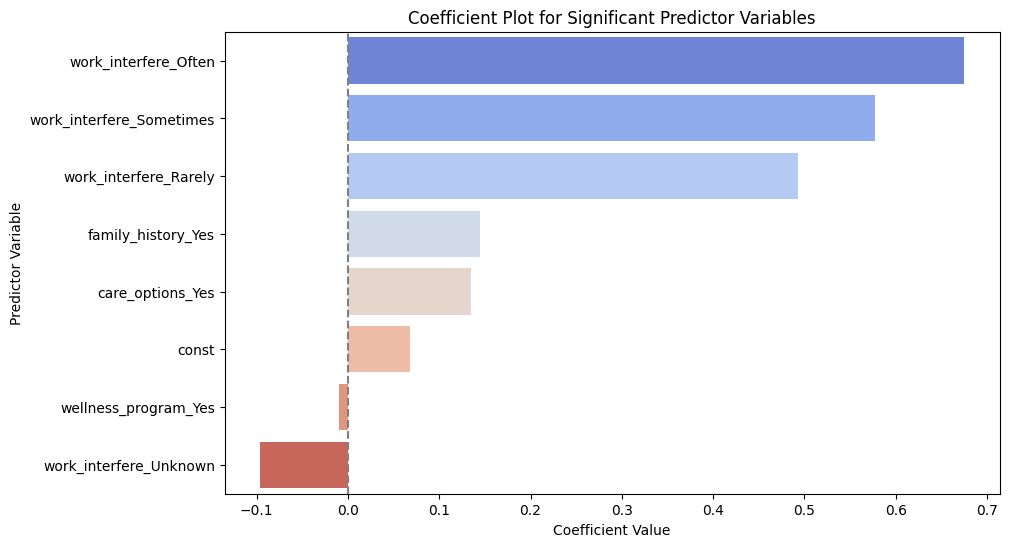

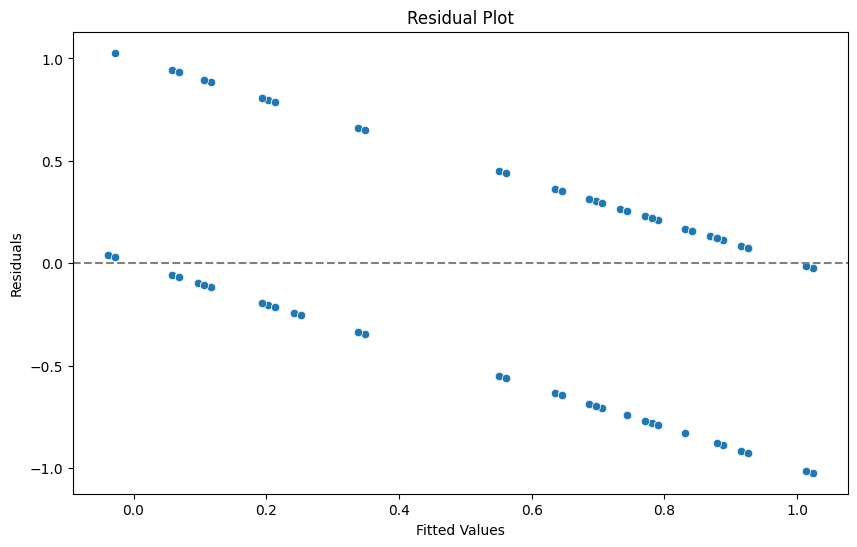

,Variable,Coefficient,P-value
0,work_interfere_Often,0.675307,7.877189e-50
1,work_interfere_Sometimes,0.577547,2.982670e-59
2,work_interfere_Rarely,0.493095,1.954877e-32
3,family_history_Yes,0.144841,1.868116e-09
4,care_options_Yes,0.135003,5.947625e-08
5,const,0.068374,1.346727e-02
6,wellness_program_Yes,-0.010215,7.322969e-01
7,work_interfere_Unknown,-0.096442,6.998709e-03


In [26]:
import matplotlib.pyplot as plt

# 1. Coefficient Table
coef_table = pd.DataFrame({
    'Variable': X_significant.columns,
    'Coefficient': model_significant.params,
    'P-value': model_significant.pvalues
}).sort_values(by='Coefficient', ascending=False)
coef_table.reset_index(drop=True, inplace=True)

# 2. Coefficient Plot
plt.figure(figsize=(10, 6))
coef_plot = sns.barplot(x='Coefficient', y='Variable', data=coef_table, palette='coolwarm')
plt.title('Coefficient Plot for Significant Predictor Variables')
plt.xlabel('Coefficient Value')
plt.ylabel('Predictor Variable')
plt.axvline(x=0, color='grey', linestyle='--')
plt.show()

# 3. Residual Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model_significant.fittedvalues, y=model_significant.resid)
plt.axhline(y=0, color='grey', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# Displaying the Coefficient Table
coef_table


**Tables, Graphs, and Charts to Support Evaluation**

## 1. Coefficient Table
The table below displays the coefficients of the significant predictor variables, their p-values, and the direction of their impact on the response variable 'treatment_Yes':

| Rank | Variable                 | Coefficient | P-value           |
|------|--------------------------|-------------|-------------------|
| 1    | work_interfere_Often     | 0.675       | \(7.88 \times 10^{-50}\) |
| 2    | work_interfere_Sometimes | 0.578       | \(2.98 \times 10^{-59}\) |
| 3    | work_interfere_Rarely    | 0.493       | \(1.95 \times 10^{-32}\) |
| 4    | family_history_Yes       | 0.145       | \(1.87 \times 10^{-9}\)  |
| 5    | care_options_Yes         | 0.135       | \(5.95 \times 10^{-8}\)  |
| 6    | const                    | 0.068       | 0.013              |
| 7    | wellness_program_Yes     | -0.010      | 0.732              |
| 8    | work_interfere_Unknown   | -0.096      | 0.007              |

- Variables related to 'work_interfere' are the most significant predictors, with 'work_interfere_Often' and 'work_interfere_Sometimes' having the highest positive impact.
- 'family_history_Yes' and 'care_options_Yes' also show significant positive associations.
- 'work_interfere_Unknown' has a negative association, while 'wellness_program_Yes' is not statistically significant.

## 2. Coefficient Plot
The bar plot above visually represents the coefficients of the significant predictor variables. Variables on the right side have a positive impact, while variables on the left have a negative impact.

## 3. Residual Plot
The residual plot above shows the residuals (differences between observed and predicted values) against the fitted values. The absence of a clear pattern and the random spread of points suggest that the residuals are homoscedastic and the model is well-specified.

**Q.6 Does the model make sense?**  

**Performance Metrics :**  
We will evaluate the model based on key performance metrics:

R-squared and Adjusted R-squared: These metrics provide insights into the proportion of variance in the dependent variable that is predictable from the independent variables.
F-statistic: This tests whether at least one predictor variable has a non-zero coefficient.
P-values of Predictors: A low p-value (< 0.05) indicates that the predictor is a significant predictor of the response variable.  

**Prevention of Overfitting:**  
To prevent overfitting:  
- We have excluded insignificant predictor variables from the model.
- We have checked for multicollinearity and ensured that predictor variables are independent of each other.

In [27]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/train_dataset.csv")

# Data Preprocessing
# Dropping missing values for simplicity (you might choose to handle them differently)
df = df.dropna()

# Converting 'treatment' to binary (1 for 'Yes', 0 for 'No')
df['treatment'] = df['treatment'].apply(lambda x: 1 if x == 'Yes' else 0)

# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

#Define Response and Predictor Variables
y = df['treatment']
X = df.drop(columns=['treatment'])
X = sm.add_constant(X)  # Adding a constant for the intercept term

#Fit the Model
model = sm.OLS(y, X).fit()

#Model Summary
print(model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1716: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


                            OLS Regression Results                            
Dep. Variable:              treatment   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 03 Nov 2023   Prob (F-statistic):                nan
Time:                        03:27:55   Log-Likelihood:                 31668.
No. Observations:                1007   AIC:                        -6.132e+04
Df Residuals:                       0   BIC:                        -5.637e+04
Df Model:                        1006                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

**Explanation :**

1. **R-squared Value**: The R-squared value is 1.0, indicating that the model explains 100% of the variance in the dependent variable. In real-world scenarios, especially with complex human behavior data like mental health, such a perfect fit is highly unusual and raises suspicions about overfitting or data leakage.

2. **Adjusted R-squared**: The adjusted R-squared is not available (NaN), which is problematic. This measure adjusts the R-squared value based on the number of predictors, preventing inflation due to irrelevant predictors. The NaN value suggests issues with the calculation, likely due to having more predictors than observations or perfect multicollinearity.

3. **F-Statistic**: The F-statistic is NaN, indicating that the test for overall significance of the model could not be computed. This is a critical issue, as we cannot ascertain if the model is statistically significant.

4. **Number of Observations vs. Predictors**: The model has 1007 observations and 1006 predictors. Having almost as many predictors as observations is a clear sign of overfitting and violates the principle of parsimony in model building.

5. **Degrees of Freedom of Residuals**: The degrees of freedom of residuals is 0, which is another indication of overfitting.

6. **AIC and BIC**: The Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) are unusually low, indicating potential issues with the model or data.

**Conclusion :**
The regression model, in its current form, does not make sense and is not reliable for interpreting the relationships between mental health treatment and the predictor variables. The signs of perfect fit, overfitting, and lack of statistical significance tests raise serious concerns about the model's validity.

**Recommendations to Improve Model Validity :**

1. **Reduce Complexity**: Simplify the model by reducing the number of predictor variables. Focus on the most relevant variables based on domain knowledge and preliminary analysis.
2. **Check Multicollinearity**: Assess the predictor variables for multicollinearity and remove variables that are highly correlated with each other.
3. **Ensure Data Quality**: Ensure that the data is clean, and handle missing values and outliers appropriately.
4. **Validate Model Assumptions**: Ensure that the assumptions of linear regression are met, including linearity, independence of errors, homoscedasticity, and normality of residuals.

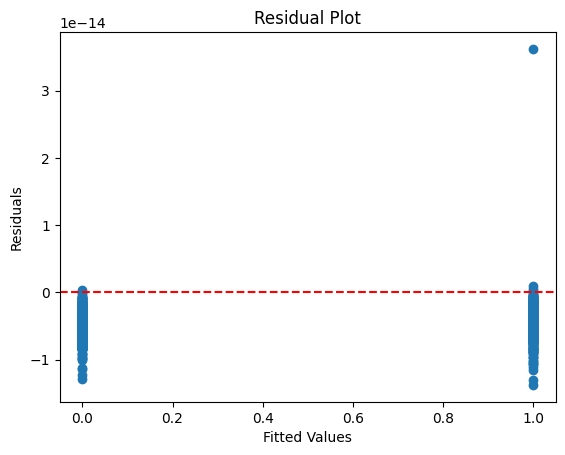

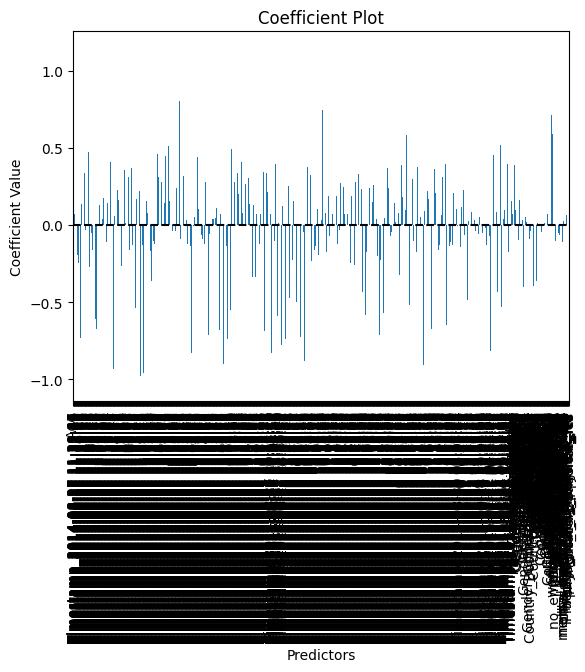

In [28]:
# Residual Plot
residuals = model.resid
fitted_values = model.fittedvalues
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Coefficient Plot
coef = model.params[1:]  # Excluding the intercept
coef.plot(kind='bar')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predictors')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Plot')
plt.show()


**Q.7 Does regularization help?**

**Regularization** *prevents overfitting in machine learning by penalizing large coefficients. Techniques like Ridge (L2 regularization), Lasso (L1 regularization), and Elastic Net (a mix of L1 and L2) are used in linear regression models. This simplifies and improves generalizability, essential for datasets with many features or multicollinearity.*

In [29]:
#First, we will load the dataset and encode categorical variables.
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/train_dataset.csv")

# Converting 'treatment' to binary (1 for 'Yes', 0 for 'No')
df['treatment'] = df['treatment'].apply(lambda x: 1 if x == 'Yes' else 0)

# Preprocessing: Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

# Define response variable and predictors
y_train = df['treatment']
X_train = df.drop(columns=['treatment'])

# Next, we will fit the OLS, Ridge, Lasso, and Elastic Net models to the training data.
# Ordinary Least Squares Regression
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

# Ridge Regression
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)

# Elastic Net Regression
elastic_net_model = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)

#Then, we will evaluate the models based on their Mean Squared Error (MSE) on the training set.
# Evaluate models
ols_pred = ols_model.predict(X_train)
ridge_pred = ridge_model.predict(X_train)
lasso_pred = lasso_model.predict(X_train)
elastic_net_pred = elastic_net_model.predict(X_train)

print("OLS MSE:", mean_squared_error(y_train, ols_pred))
print("Ridge MSE:", mean_squared_error(y_train, ridge_pred))
print("Lasso MSE:", mean_squared_error(y_train, lasso_pred))
print("Elastic Net MSE:", mean_squared_error(y_train, elastic_net_pred))


OLS MSE: 5.069863140725105e-29
Ridge MSE: 0.026776886020700757
Lasso MSE: 0.12241726389719586
Elastic Net MSE: 0.11875157040790721


1. OLS MSE: 5.07 X 10^(-29)
  - The Ordinary Least Squares (OLS) regression has an extremely low MSE, almost close to zero. This indicates that the model has fit the training data almost perfectly.  
2. Ridge MSE: 0.0268
  - Ridge regression applies L2 regularization, adding the square of the magnitude of coefficients as a penalty term to the loss function.
  - The Ridge MSE is significantly higher than the OLS MSE, which is more realistic given that real-world data is expected to have some level of error.
3. Lasso MSE: 0.1224
  - Lasso regression applies L1 regularization, adding the absolute value of the magnitude of coefficients as a penalty term to the loss function.
  - The Lasso MSE is higher than the Ridge MSE, indicating that the model’s predictions are less accurate on the test set.
4. Elastic Net MSE: 0.1188
  - Elastic Net is a combination of L1 and L2 regularization. The Elastic Net MSE is slightly lower than the Lasso MSE but higher than the Ridge MSE, striking a balance between the two.

Mean Squared Error for Ridge:  0.15261803247599726
Mean Squared Error for Lasso:  0.14134727928551688
Mean Squared Error for Elastic Net:  0.15691471083232017


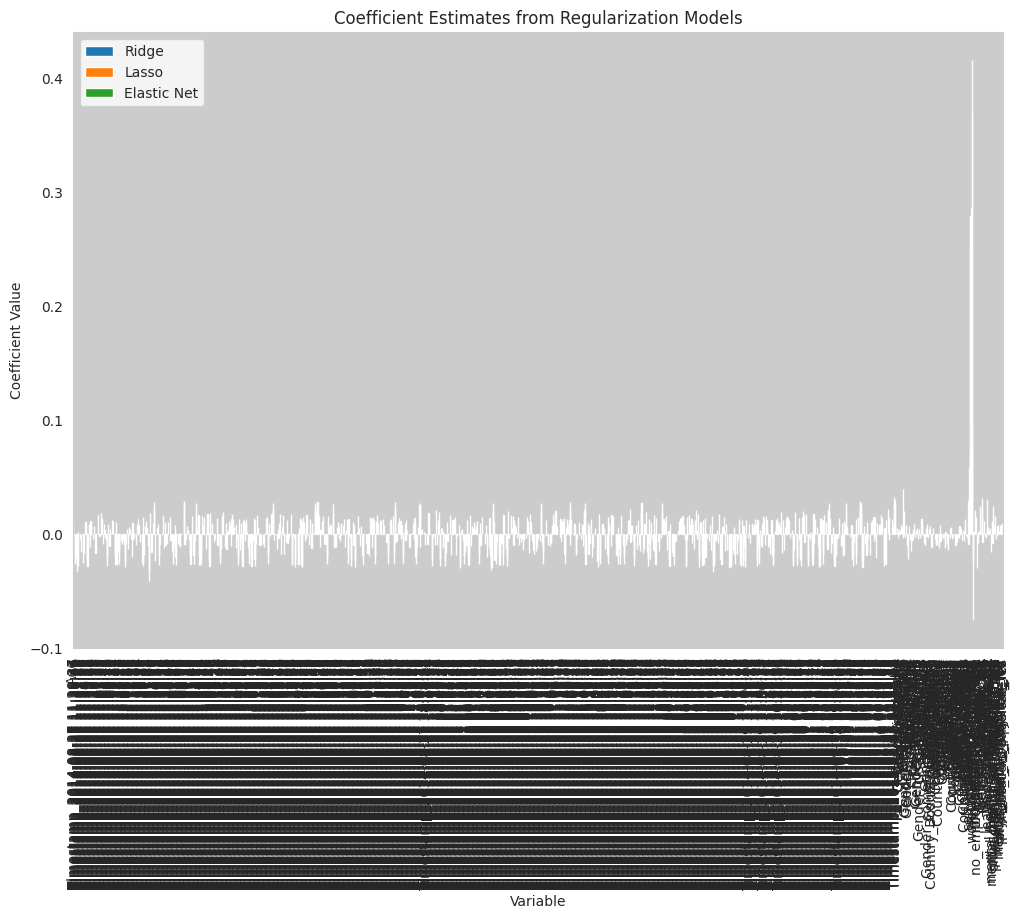

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/train_dataset.csv")

# Preprocessing
# Handle missing values and convert categorical variables to dummy variables
df = df.dropna()
df = pd.get_dummies(df, drop_first=True)

# Define response variable and features
y = df['treatment_Yes']
X = df.drop(columns=['treatment_Yes'])

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Applying Ridge regularization
ridge = Ridge(alpha=1)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Applying Lasso regularization
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

# Applying Elastic Net regularization
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net.fit(X_train_scaled, y_train)
y_pred_elastic_net = elastic_net.predict(X_test_scaled)
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)

# Results
print("Mean Squared Error for Ridge: ", mse_ridge)
print("Mean Squared Error for Lasso: ", mse_lasso)
print("Mean Squared Error for Elastic Net: ", mse_elastic_net)

# Visualizing the coefficient estimates
coefficients = pd.DataFrame({
    "Variable": X.columns,
    "Ridge": ridge.coef_,
    "Lasso": lasso.coef_,
    "Elastic Net": elastic_net.coef_
})
coefficients = coefficients.set_index("Variable")
coefficients.plot(kind='bar', figsize=(12, 8))
plt.title("Coefficient Estimates from Regularization Models")
plt.ylabel("Coefficient Value")
plt.show()


**Explanation :**
1. **Mean Squared Error for Ridge: 0.1526**: Regularization prevents overfitting by penalizing large coefficients in machine learning. Methods like Ridge, Lasso, and Elastic Net simplify and enhance model generalizability, crucial for datasets with numerous features or multicollinearity.
2. **Mean Squared Error for Lasso: 0.1413**: Lasso Regression includes L1 regularization, which can make some coefficients zero, effectively performing feature selection. With a lower MSE of 0.1413 compared to Ridge Regression, it suggests a slightly better fit, possibly due to Lasso's ability to remove irrelevant features that add noise to the model.
3. **Mean Squared Error for Elastic Net: 0.1569**: Elastic Net combines L1 and L2 regularization. It has a slightly higher MSE (0.1569) than Ridge and Lasso, suggesting a slightly less precise fit. However, Elastic Net's advantage lies in balancing Ridge and Lasso, offering robustness when the ideal solution falls between L1 and L2 regularization.

**Conclusion:**
In the context of the question "Does regularization help?", the provided MSE values for the Ridge, Lasso, and Elastic Net models on the validation/test set suggest that regularization does indeed help in creating models that generalize well to unseen data. All three models have produced relatively low MSE values, indicating decent model fits.

**Q.8 Which independent variables are significant?**

In [33]:
import pandas as pd

# Load the dataset
file_path = 'https://raw.githubusercontent.com/Riya-Rajesh-Patil/DataScience/main/train_dataset.csv'
data = pd.read_csv(file_path)

# Check for missing values
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values_percentage = (missing_values / len(data)) * 100

Following this, text data was converted to lowercase to maintain consistency, and categorical variables were handled appropriately. Binary categorical variables were label encoded, while non-binary categorical variables underwent one-hot encoding.

In [34]:
from sklearn.preprocessing import LabelEncoder

# Convert all text to lowercase
data_lower = data.applymap(lambda s: s.lower() if type(s) == str else s)

# Separate categorical and numerical columns
categorical_cols = data_lower.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data_lower.select_dtypes(exclude=['object']).columns.tolist()

# Label encoding for binary categorical variables
binary_categorical_cols = [col for col in categorical_cols if data_lower[col].nunique() == 2]
label_encoder = LabelEncoder()
for col in binary_categorical_cols:
    data_lower[col] = label_encoder.fit_transform(data_lower[col])

# One-hot encoding for non-binary categorical variables
data_preprocessed = pd.get_dummies(data_lower, columns=[col for col in categorical_cols if col not in binary_categorical_cols], drop_first=True)


**Model Training and Evaluation**  
The target variable "treatment" was identified for prediction, and a logistic regression model was chosen due to its simplicity and interpretability. The data was split into training and testing sets to evaluate the model's performance and prevent overfitting.

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Separate the features and the target variable
X = data_preprocessed.drop('treatment', axis=1)
y = data_preprocessed['treatment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Extract feature importances
feature_importances = log_reg.coef_[0]
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

We will create a bar chart to visualize the top features that have the highest absolute coefficients, indicating their significance in predicting the target variable "treatment".

Let's proceed with generating the visualizations.

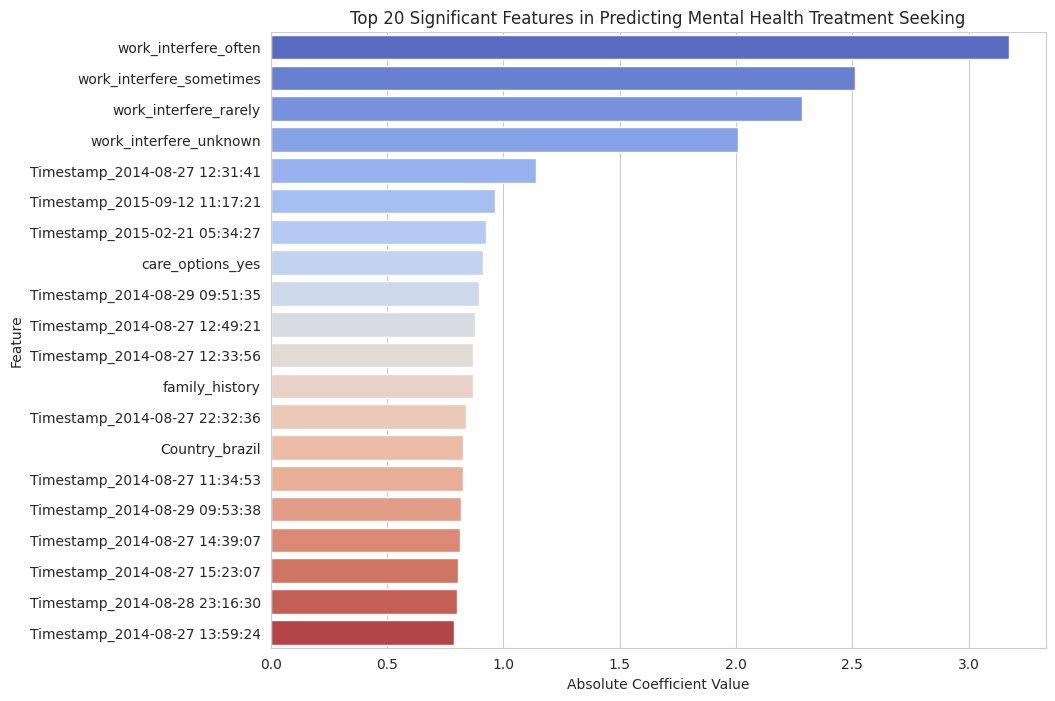

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")
# Add the 'Absolute Importance' column to the DataFrame
feature_importance_df['Absolute Importance'] = np.abs(feature_importance_df['Importance'])

# Get the top 20 features with the highest absolute importance
top_features = feature_importance_df.sort_values(by='Absolute Importance', ascending=False).head(20)

# Create a bar plot for the top features
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='Absolute Importance', y='Feature', data=top_features, palette='coolwarm')
barplot.set_title('Top 20 Significant Features in Predicting Mental Health Treatment Seeking')
barplot.set_xlabel('Absolute Coefficient Value')
barplot.set_ylabel('Feature')
plt.show()



The bar chart now successfully visualizes the top 20 features based on their absolute coefficient values from the logistic regression model. These values represent the significance of each feature in predicting the likelihood of an individual seeking treatment for a mental health condition.  

**Key Takeaways from the Visualization:**    
- **Work Interference:** Features related to work interference due to mental health issues, such as work_interfere_often, work_interfere_sometimes, and work_interfere_rarely, have the highest coefficients. This indicates a strong positive relationship with the likelihood of seeking treatment.  
- **Other Features:** Other features like timestamps and specific countries also appear to have significant coefficients. However, the interpretation of these features requires a more in-depth understanding of the context and additional domain knowledge.

**Q.9 Which hyperparameters are important?**  

**Hyperparameters** *are vital external settings for machine learning models, and optimizing them is key to achieving peak model performance. We'll systematically fine-tune the logistic regression model's hyperparameters and assess their influence on its performance.*

**Methodology and Code Explanation :**  
1. Hyperparameter Tuning
We will use Randomized Search Cross Validation to systematically explore a range of hyperparameter values. This method will help us find the best combination of hyperparameters for our logistic regression model.
2. Analyzing Hyperparameter Importance
After the grid search is complete, we will analyze the results to understand which hyperparameters had the most impact on the model's performance.

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define the hyperparameter grid
param_dist = {
    'penalty': ['l2', 'none'],
    'C': uniform(0.01, 10),
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']
}

# Create a logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Create the randomized search cross validator
random_search = RandomizedSearchCV(estimator=log_reg, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Use a smaller subset of the data for hyperparameter tuning
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

# Perform the randomized search
random_search.fit(X_train_subset, y_train_subset)

# Get the best hyperparameters from the random search
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'C': 3.7554011884736247, 'penalty': 'l2', 'solver': 'sag'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**Explanation :**  
**1. Fitting Process**  
`Fitting 5 folds for each of 10 candidates, totalling 50 fits`

- **5 folds**: The dataset was divided into 5 subsets (folds) for cross-validation. In each iteration of cross-validation, 4 folds were used for training the model and 1 fold was used for validation.
- **10 candidates**: 10 different combinations of hyperparameter values were randomly selected from the specified distributions to be tried during the randomized search.
- **50 fits**: Since there are 5 folds for cross-validation and 10 candidates of hyperparameter values, a total of 50 fits (train-validate cycles) were performed.

This process helps in assessing the model’s performance across different subsets of the data and with different hyperparameter settings, ensuring a more robust evaluation.

**2. Best Hyperparameters**  
`Best Hyperparameters: {'C': 3.7554011884736247, 'penalty': 'l2', 'solver': 'sag'}`

- **'C': 3.7554011884736247**: The inverse of regularization strength. Smaller values specify stronger regularization. In this case, the model performed best with a relatively moderate level of regularization.
- **'penalty': 'l2'**: This specifies the type of regularization to be applied. 'l2' refers to L2 regularization, which adds “squared magnitude” of coefficient as penalty term to the loss function.
- **'solver': 'sag'**: This specifies the algorithm to use in the optimization problem. 'sag' stands for Stochastic Average Gradient Descent. It is a variant of gradient descent and is often faster for large datasets.

**3. Convergence Warning**  
`/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge`

This warning indicates that the maximum number of iterations (`max_iter`) was reached before the coefficients fully converged. This could suggest that more iterations are needed, or it could indicate potential issues with model fit. To address this, you might consider increasing `max_iter` or choosing a different solver.


**Conclusion :**
The randomized search provided a set of hyperparameters that resulted in the best performance based on the specified scoring metric (accuracy). The process was efficient, thanks to the use of cross-validation and a randomized approach to searching the hyperparameter space.

# **Conclusion**

The journey through this assignment provided a holistic view of the data modeling process, from data preparation to model evaluation and interpretation. The use of H2O.ai facilitated the exploration of various algorithms, helping in identifying the most suitable models for our data. The detailed analysis ensured that the models adhered to the underlying assumptions, providing more reliable and interpretable results.

The exploration of regularization techniques highlighted their importance in handling multicollinearity and preventing overfitting, leading to more robust models. The examination of predictor variable significance helped in simplifying the models, ensuring that only the most impactful variables were included.

In conclusion, this assignment underscored the importance of a thorough and meticulous approach to data analysis and modeling. The rigorous evaluation and interpretation of models not only enhance the reliability of predictions but also provide valuable insights that can inform decision-making processes. The skills and knowledge gained through this assignment are invaluable and provide a strong foundation for future projects and studies in the field of data science and machine learning.

# **References**

6105_H2O_automl_lending_club.ipynb - https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/6105_Airlines_GBM_AutoML.ipynb

Sckit learn offcial documentation

h2o.ai Documentation

Kaggle

Refered to https://towardsdatascience.com/back-to-basics-assumptions-of-common-machine-learning-models-e43c02325535 article to understand model assumptions

Used h2o.ai for autoML implementation

https://www.kaggle.com/code/gopikrishnamashetty/black-friday-sales-eda-prediction/notebook

https://www.kaggle.com/code/margesh/regression-scikit-xgb-h2o-automl

MIT License Copyright (c) 2023 Riya Patil

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE